In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import numpy as np

from lint.models import Token

def token_series(token, *args, **kwargs):
    
    series = Token.token_series(token, *args, **kwargs)
    
    total_count = sum(series.values())
    
    f_obs = np.zeros(100)
    
    for offset, count in series.items():
        f_obs[offset] = count/total_count
        
    return f_obs

In [13]:
import numpy.polynomial.polynomial as poly

def plot_time_slices(token, y1=1840, y2=2000, w=20):
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    
    cm = plt.get_cmap('plasma')
    
    years = range(y1, y2, w)
    
    colors = [
        cm(1.*i/len(years))
        for i in range(len(years))
    ]
    
    ax.set_color_cycle(colors)
    
    lines = []
    for y in years:
        
        # Plot the raw series.
        Y = token_series(token, year1=y, year2=y+w)
        line, = ax.plot(Y, label=y)
        lines.append(line)
        
        X = np.arange(100)
        
        coef = poly.polyfit(X, Y, 8)
        ffit = poly.polyval(X, coef)
        
        # Plot fit.
        ax.plot(X, ffit, color='gray')
        
    plt.legend(
        handles=lines,
        bbox_to_anchor=(1.03, 1),
        loc=2,
        borderaxespad=0,
    )
        
    print(token)
    plt.show()

a


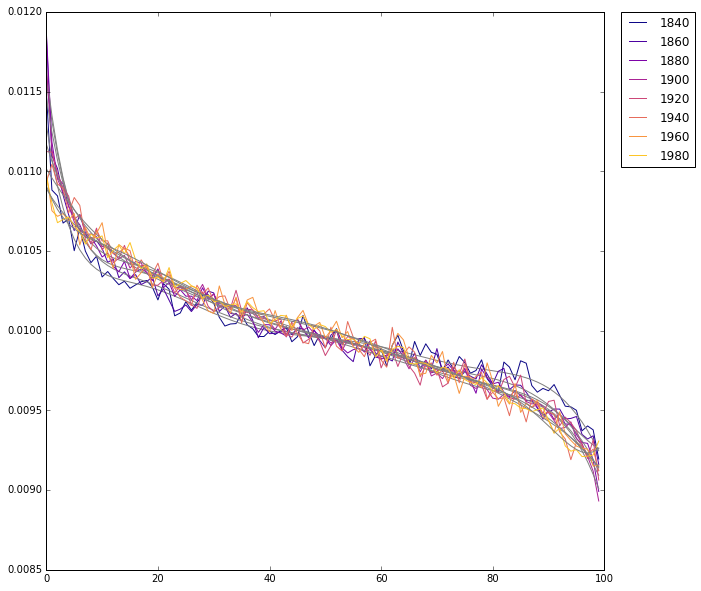

had


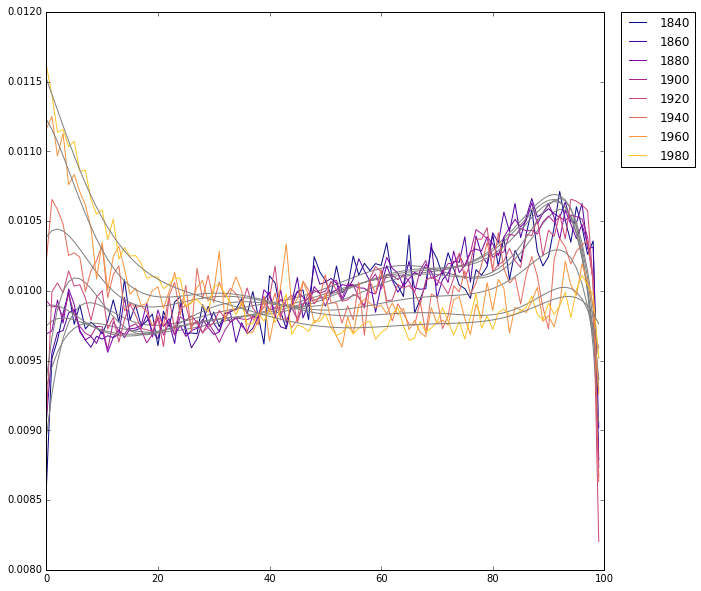

been


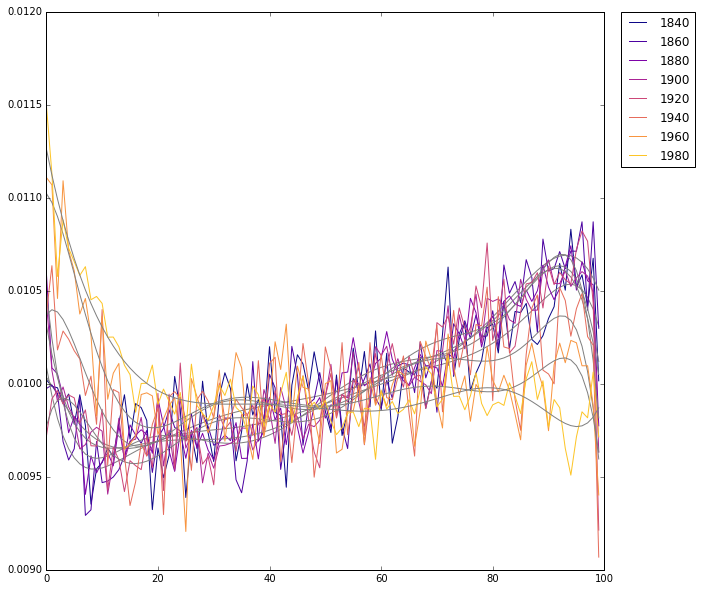

fire


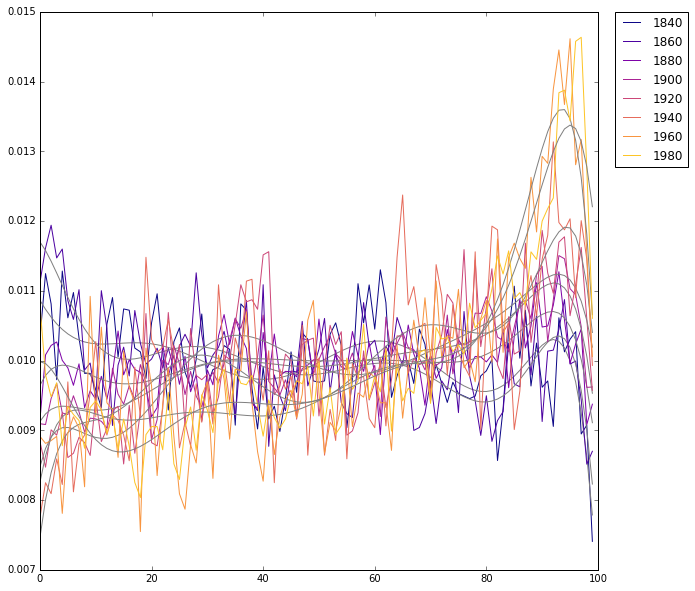

In [15]:
plot_time_slices('a')
plot_time_slices('had')
plot_time_slices('been')
plot_time_slices('fire')